In [1]:
from utils import *
from plots import *

In [2]:
p = r'/Users/jquinnlee/Desktop/georepca1/georepca1'
os.chdir(p)

In [3]:
animals = ['QLAK-CA1-08', 'QLAK-CA1-30', 'QLAK-CA1-50', 'QLAK-CA1-51', 'QLAK-CA1-56', 'QLAK-CA1-74', 'QLAK-CA1-75']

##
## Figure 2B
#### Generate 3x3 Partitioned rate map representational similarity matrix

In [4]:
# Calculate and save cell-wise, partition-wise rsm for all animals from rate map data
for animal in animals:
    dat = load_dat(animal, p, format="joblib")
    rsm_parts, rsm_labels, rsm_cell_idx = get_cell_rsm_partitioned(dat[animal]['maps'], d_thresh=0)
    rsm_dict = {'RSM': rsm_parts, 'd_labels': rsm_labels[:, 0], 'p_labels': rsm_labels[:, 1],
                'cell_idx': rsm_cell_idx, 'envs': dat[animal]['envs']}
    joblib.dump(rsm_dict, os.path.join(p, "results", f'{animal}_rsm_partitioned'))
    del dat

# Combine averaged partition-wise RSM for all animals and sequences
rsm_parts_animals = get_rsm_partitioned_sequences(animals, p)

# Order partitioned rsms across animals
rsm_parts_ordered, rsm_parts_averaged = get_rsm_partitioned_similarity(rsm_parts_animals, animals,
                                                                       False, False)

QLAK-CA1-08
QLAK-CA1-30
QLAK-CA1-50
QLAK-CA1-51
QLAK-CA1-56
QLAK-CA1-74
QLAK-CA1-75


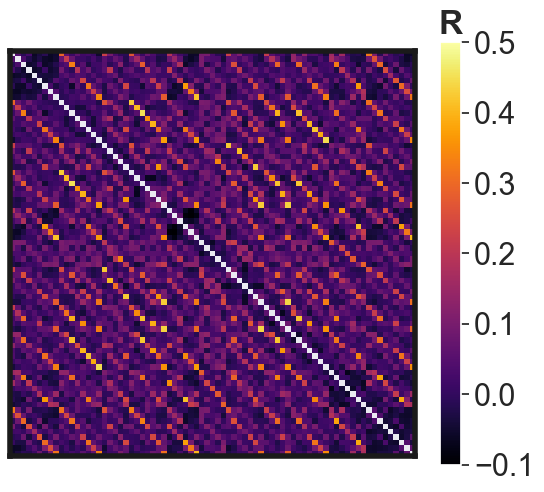

In [5]:
fig_b = plot_rsm_parts_averaged(rsm_parts_averaged, vmax=0.5)

##
## Figure 2C
#### Embed partitioned RSM in 2d with non-metric multidimensional scaling

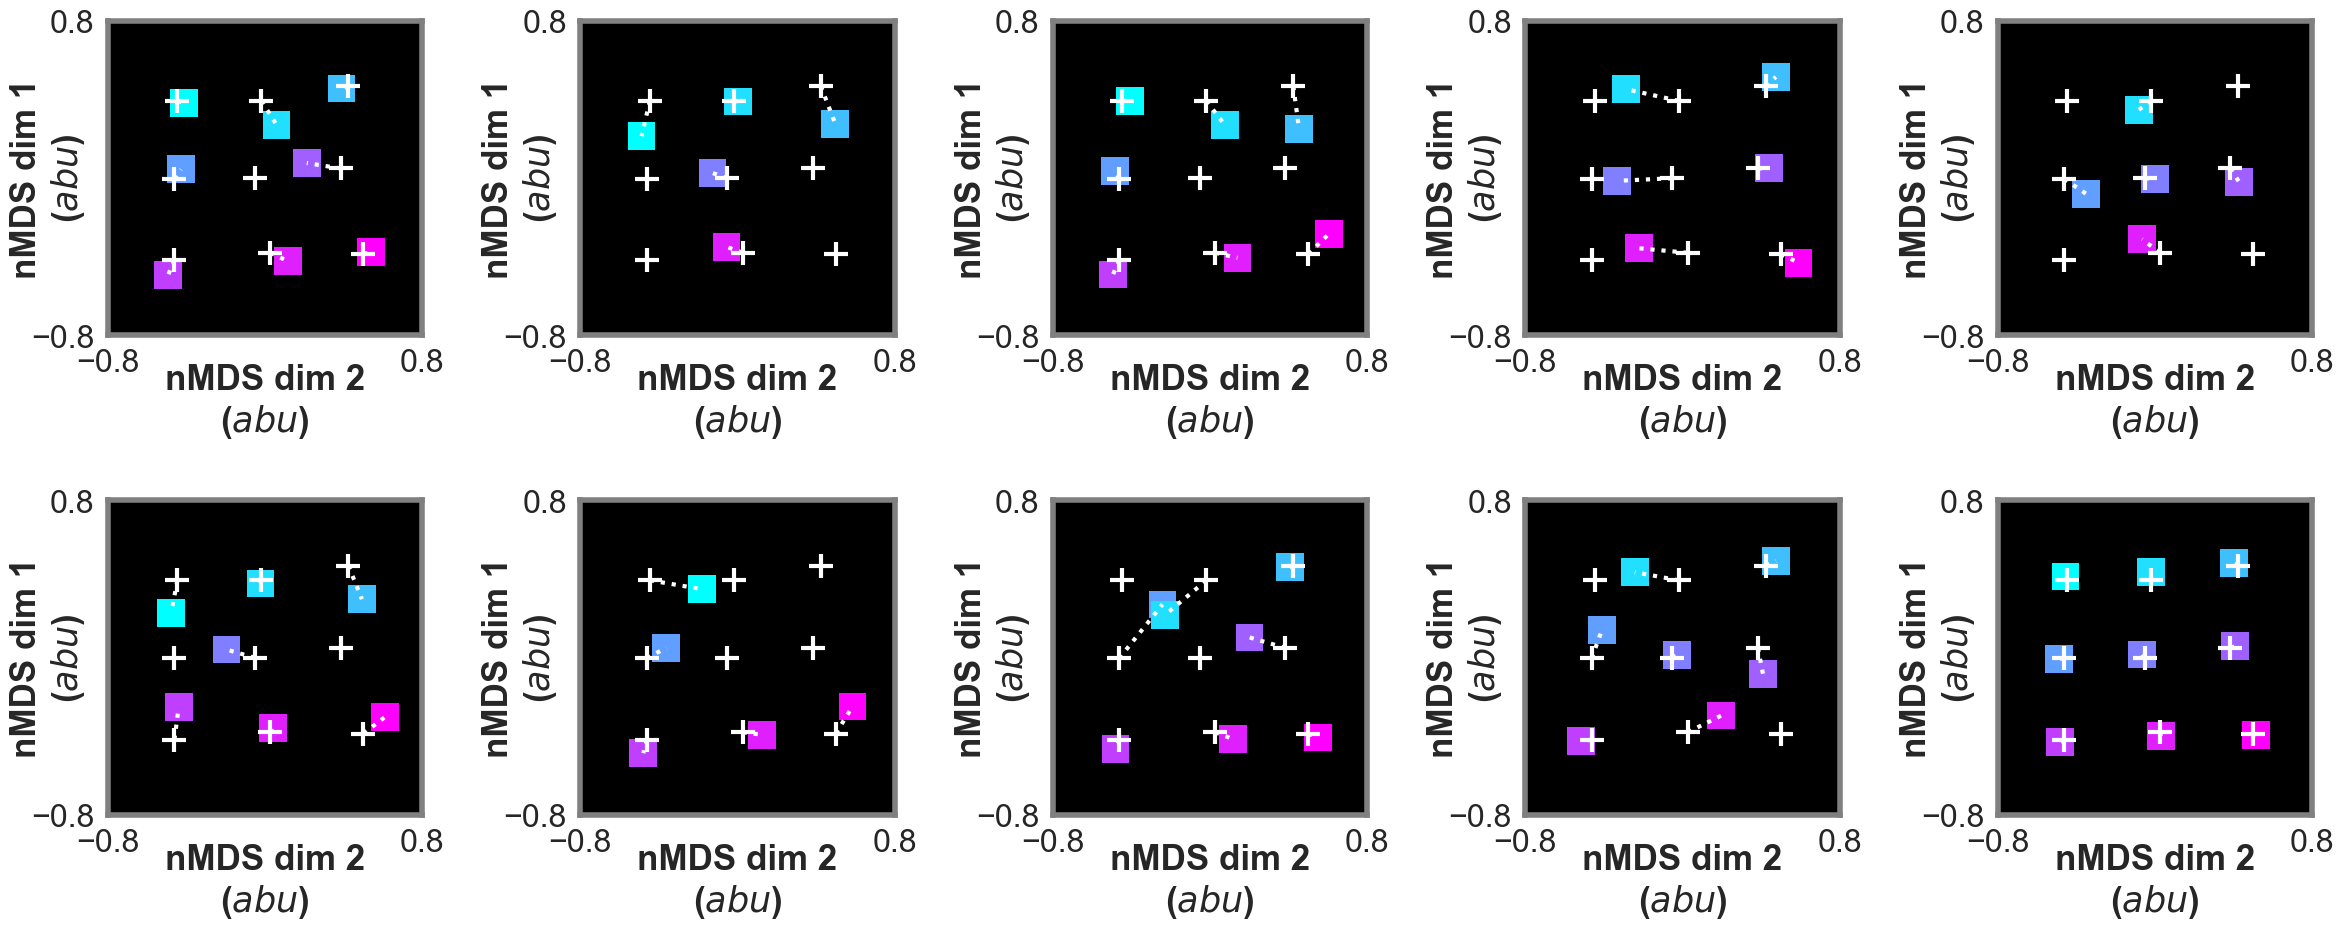

In [6]:
fig_c = plot_rsm_parts_mds(rsm_parts_averaged)

##
## Figure 2D
### Plot the average similarity of each partition in each shape to the partition in square

QLAK-CA1-08
QLAK-CA1-30
QLAK-CA1-50
QLAK-CA1-51
QLAK-CA1-56
QLAK-CA1-74
QLAK-CA1-75


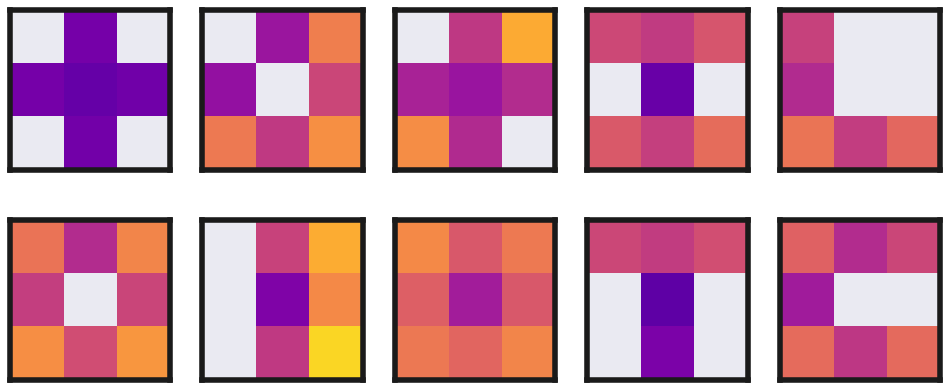

In [7]:
fig_d = plot_similarity_parts_matrix(animals, p)

##
## Figure 2E
### Plot partitioned RSMs for two animals in each sequence

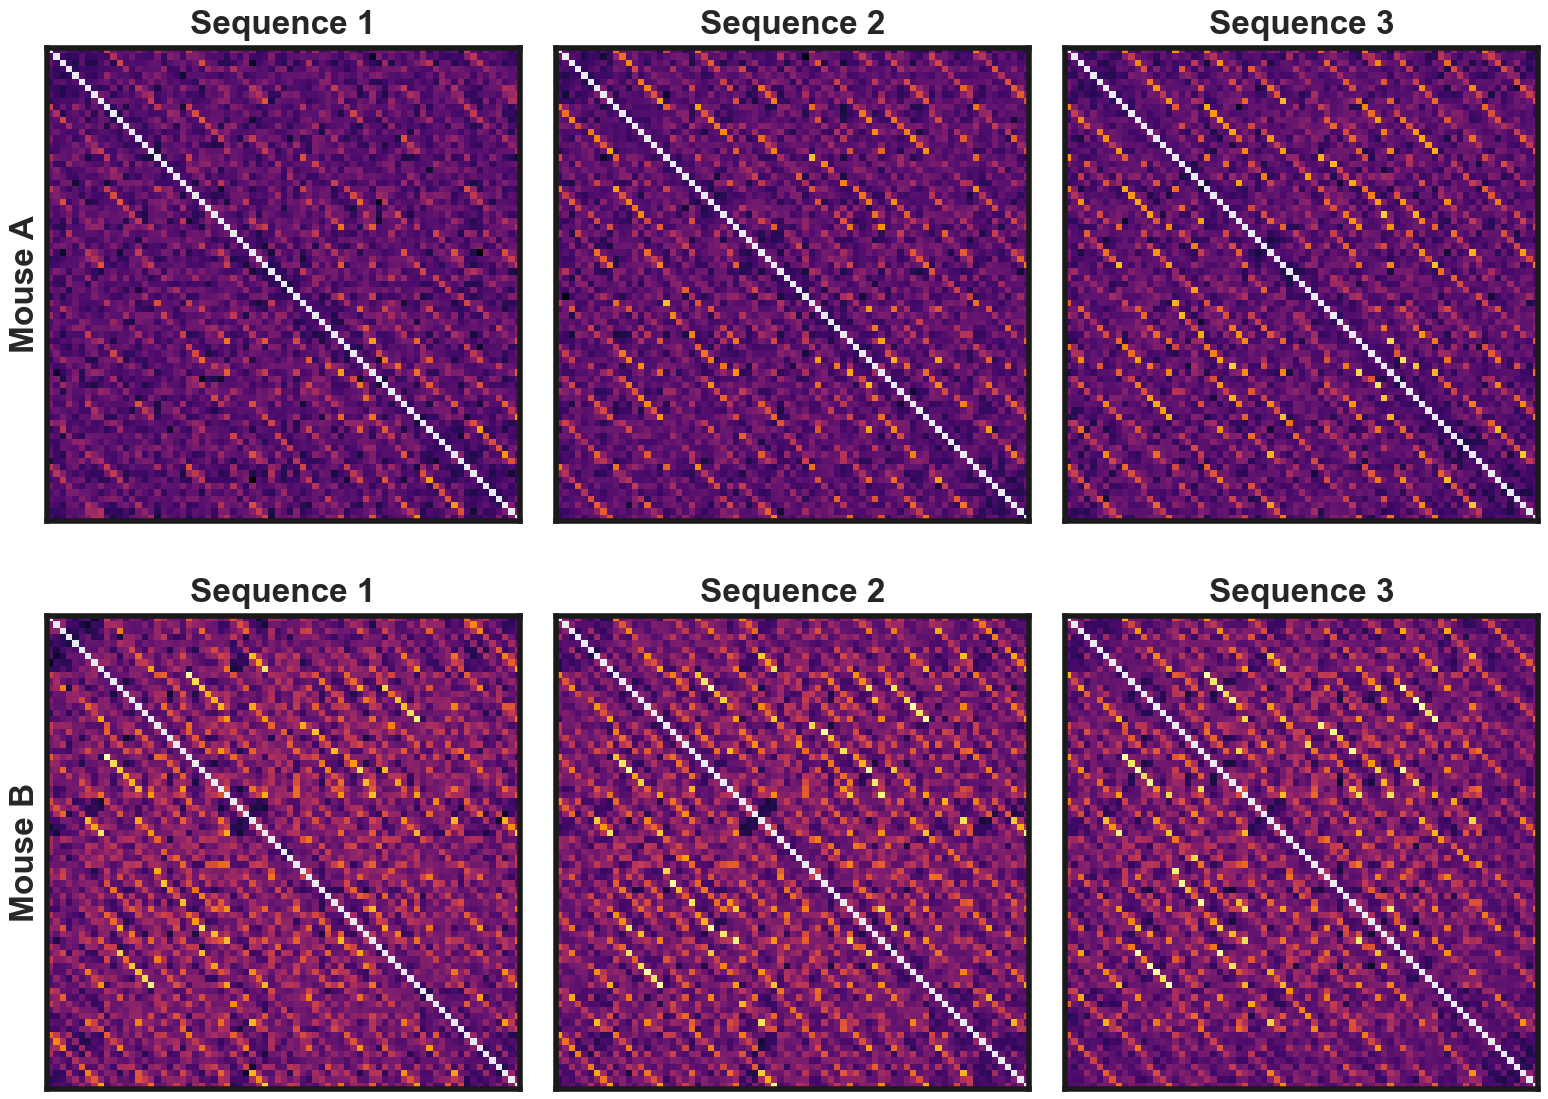

In [8]:
fig_e = plot_rsm_parts_examples(rsm_parts_ordered, 0, 2)

##
## Figure 2G-I
### Measure the similarity of partitioned RSM across animals
### Decode RSM values across animals
### Decode animal identity from individual RSM

In [9]:
# plot animal-wise similarity in each sequence and decode rsm within and across animals
df_animal_similarity, df_animal_ID, df_animals, df_sequences = predict_rsm_animals(animals, rsm_parts_animals)

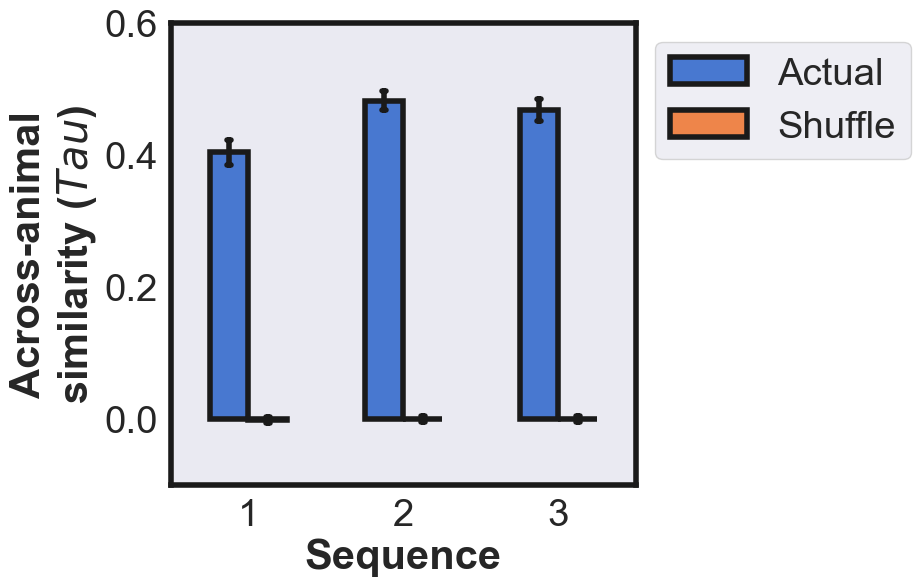

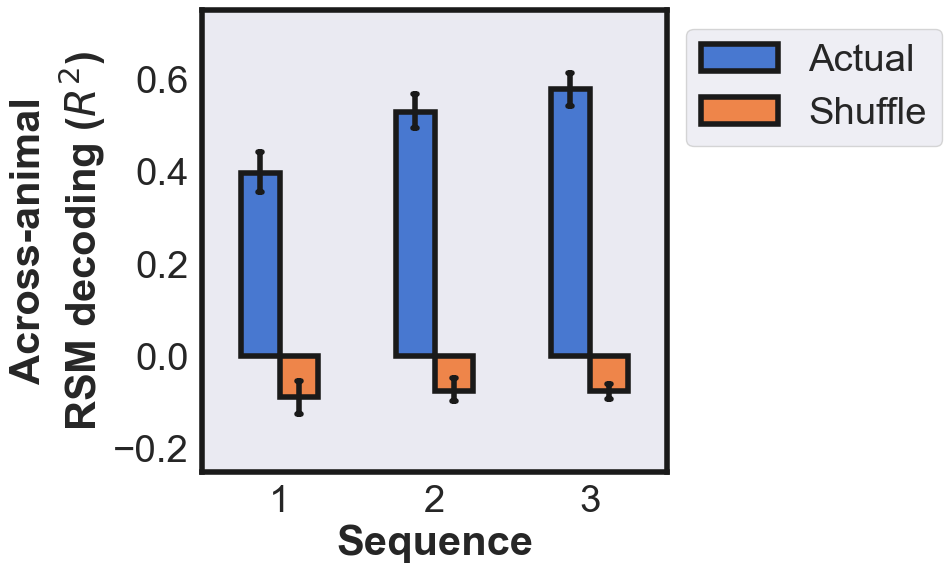

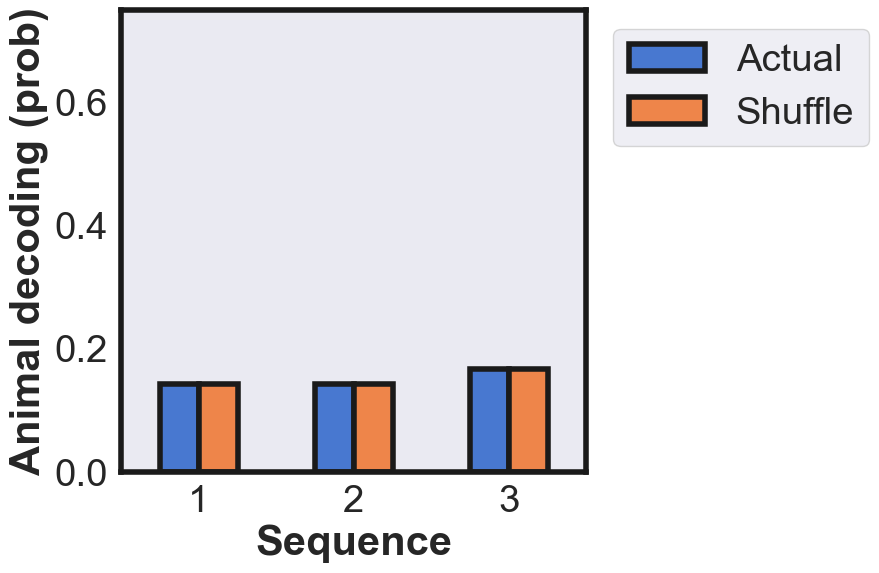

In [10]:
fig_g = plot_partitioned_rsm_similarity(df_animal_similarity)
fig_h = plot_partitioned_rsm_predictions(df_animals)
fig_i = plot_animal_id_predictions(df_animal_ID)

##
## Figure 2G
### Measure similarity of partitioned RSM across animals, resampling different numbers of cells

In [21]:
# Figure 2g
rsm_parts_animals = get_rsm_partitioned_sequences(animals, p)
n_samples = [10, 25, 50, 100, 150, 200, 300, 400, 500, 750, 1000]
df = get_partitioned_rsm_similarity_resampled(animals, rsm_parts_animals, n_samples)

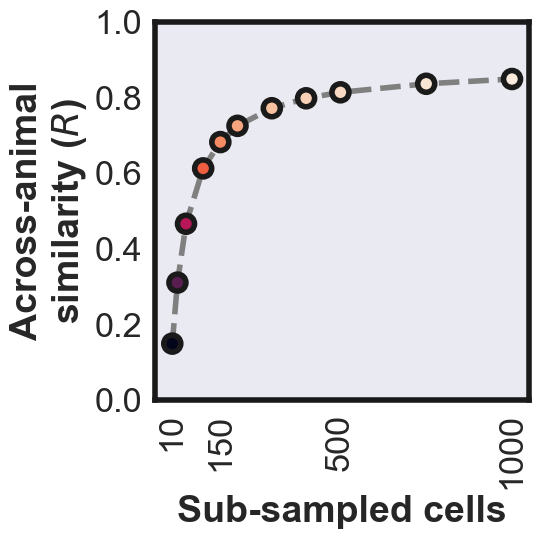

In [25]:
fig_g = plot_rsm_partitioned_similarity_resampled(df, n_samples)